<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lab 12: Clustering
#K-means clustering and heirarchical clustering

In [2]:
#k-means clustering algorithm

### The Algorithm
> 1.   Initialize K centroids to K points randomly and set each point's initial cluster as the centroid closest to it.
2.   While the clusers are changing - \\
a. Assign the new centroids as the centroids of the points which have the same assigned cluster. \\
b. Assign the new clusters to the points as the closest centroid.
3. Return the assignments and the centroids.





### Part 1 - Implementation of KMeans and testing on Synthetic Datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
blobs,blobs2=make_blobs()
print(blobs)
print(blobs2)

[[-9.50922229e+00 -2.22311453e+00]
 [ 7.43107797e+00  7.89077743e+00]
 [ 1.42850128e+00 -7.10470738e+00]
 [ 6.63234936e+00  7.87374170e+00]
 [-9.93325535e+00 -1.31317502e+00]
 [ 6.11657530e+00  9.70208951e+00]
 [-5.36896625e-01 -8.43448278e+00]
 [-1.20564985e+01 -7.68483917e-01]
 [-9.07967683e+00 -1.40946410e+00]
 [-2.54766803e+00 -5.67389701e+00]
 [-8.43073509e+00 -9.51270332e-04]
 [ 6.40986865e+00  1.04882601e+01]
 [-1.78247853e+00 -7.19047127e+00]
 [ 6.35359346e+00  8.09767917e+00]
 [-2.32901285e+00 -7.21227247e+00]
 [ 4.35921883e+00  1.06672358e+01]
 [-2.30754129e+00 -8.24521152e+00]
 [ 5.68150545e+00  7.62224172e+00]
 [ 8.04596941e+00  8.22099036e+00]
 [ 7.48831643e+00  9.68863389e+00]
 [-9.19700726e+00  6.67618187e-01]
 [ 1.03868555e+00 -8.94036741e+00]
 [-2.12604118e+00 -4.93575014e+00]
 [ 5.80708796e+00  9.80982248e+00]
 [-3.83196804e+00 -8.18893973e+00]
 [-9.75220521e+00 -8.97427963e-02]
 [-8.54980422e+00 -2.84808877e-01]
 [-7.78252175e+00 -1.10340841e+00]
 [ 6.29872221e-01 -7

In [5]:
#generating synthetic data
k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

x,y=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(x.shape))

print("Sample:")
print(x[0:5]) 
print(y[0:5])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]
[0 0 1 1 1]


In [6]:
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

In [7]:
def initializeClusterCentroids():
  for i in range(k):
    center=np.random.randint(-8,10,size=(x.shape[1],),)
    points=[]

    cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
    clusters[i]=cluster 


In [8]:
def distance(v1,v2):
  return np.sum((v2-v1)**2)**0.5

In [9]:
def assignPointsToCluster(clusters,x):
  for i in range(x.shape[0]):
    distances=[]
    for j in range(k):
      distances.append(distance(x[i],clusters[j]['center']))
    cluster_to_choose=np.argmin(distances) 
    clusters[cluster_to_choose]['points'].append(x[i]) 

In [10]:
def updateCluster(clusters):
  for i in range(k):
    cluster_points=clusters[i]['points']
    cluster_points=np.array(cluster_points)

    if len(cluster_points)>0:
      new_center=np.mean(cluster_points,axis=0)
      clusters[i]['center']=new_center
      clusters[i]['points']=[]

In [11]:
def plotClusters(clusters,plot):
  for i in range(k):
    cluster_points=clusters[i]['points']
    cluster_points=np.array(cluster_points)
    cluster_centers=clusters[i]['center']
    cluster_color=clusters[i]['color']

    if len(cluster_points)>0:
      plot.scatter(cluster_points[:,0],cluster_points[:,1],s=2,c=cluster_color)
    plot.scatter(cluster_centers[0],cluster_centers[1],s=250,c=cluster_color,marker='o')  

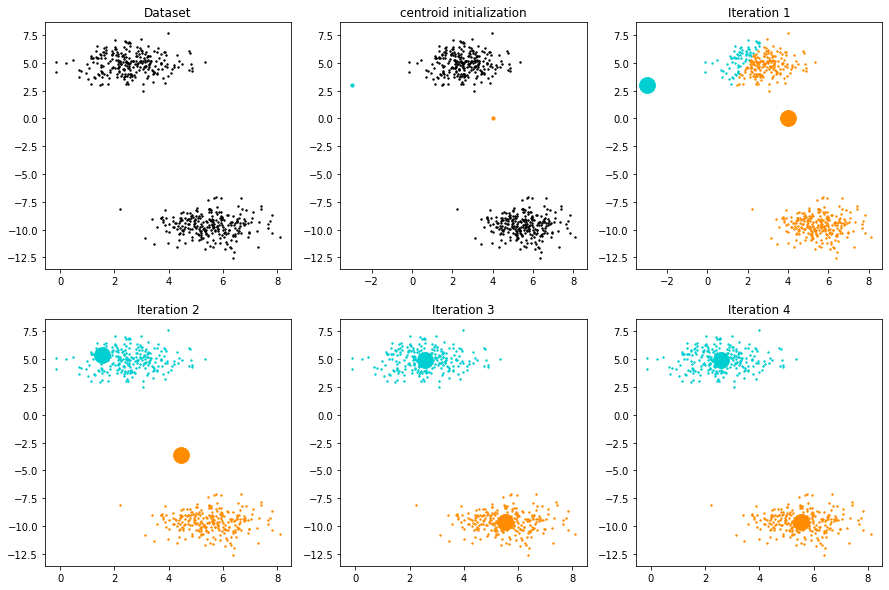

In [12]:
fig,axs=plt.subplots(2,3)
fig.set_size_inches(15,10)
axs[0,0].scatter(x[:,0],x[:,1],s=2,c='black')
axs[0,0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()
axs[0,1].scatter(x[:,0],x[:,1],s=2,c='black')
axs[0,1].set_title('centroid initialization')
for i in range(k):
  center=clusters[i]['center']
  axs[0,1].scatter(center[0],center[1],s=10,c=clusters[i]['color'],marker='o')

#epoch 1
axs[0,2].set_title('Iteration 1')  
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[0,2])
updateCluster(clusters)

#epoch 2
axs[1,0].set_title('Iteration 2')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[1,0])
updateCluster(clusters)

#epoch 3
axs[1,1].set_title('Iteration 3')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[1,1])
updateCluster(clusters)

#epoch 4
axs[1,2].set_title('Iteration 4')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[1,2])
updateCluster(clusters)

In [13]:
#generating synthetic data for k=5 
k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

x,_=make_blobs(n_samples=500,n_features=2,centers=k,random_state=10)
print('shape='+str(x.shape))

print('sample:')
print(x[:5])

shape=(500, 2)
sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


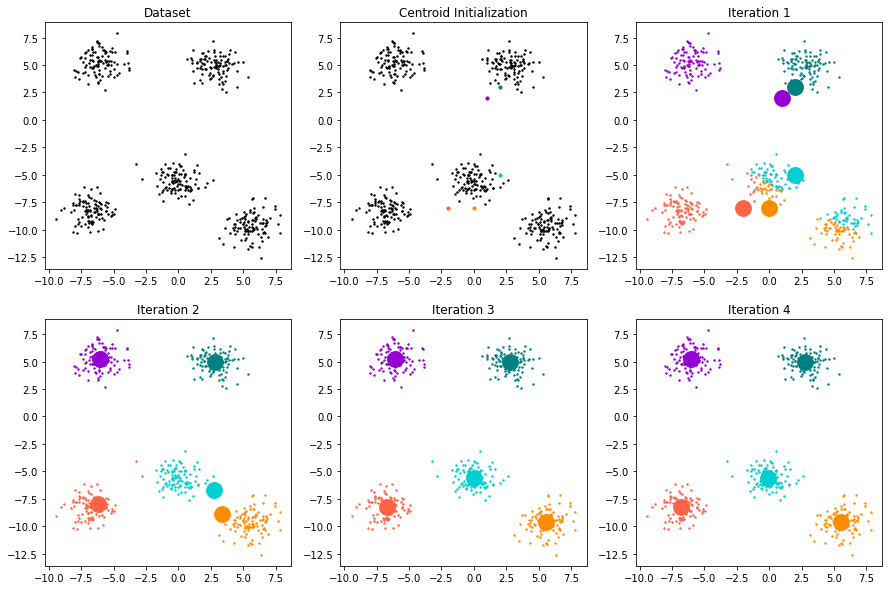

In [14]:
fig,axs=plt.subplots(2,3)
fig.set_size_inches(15,10)
axs[0,0].scatter(x[:,0],x[:,1],s=2,c='black')
axs[0,0].set_title('Dataset')

np.random.seed(3)
initializeClusterCentroids()

axs[0,1].set_title('Centroid Initialization')
axs[0,1].scatter(x[:,0],x[:,1],s=2,c='black')
for i in range(k):
  center=clusters[i]['center']
  axs[0,1].scatter(center[0],center[1],s=10,c=clusters[i]['color'],marker='o')

#epoch 1
axs[0,2].set_title('Iteration 1')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[0,2])
updateCluster(clusters) 

#epoch 2
axs[1,0].set_title('Iteration 2')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[1,0])
updateCluster(clusters)

#epoch 3
axs[1,1].set_title('Iteration 3')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[1,1])
updateCluster(clusters)

#epoch 4
axs[1,2].set_title('Iteration 4')
assignPointsToCluster(clusters,x)
plotClusters(clusters,axs[1,2])
updateCluster(clusters)

**As you can see, changing the random seed and hence changing the initialization has a large effect on the performance of KMeans.**

Hence our KMeans algo can be run by calling the following function with appropriate X (dataset)

In [15]:
from copy import deepcopy

def run_kmeans(k,x):
  initializeClusterCentroids()
  assignPointsToCluster(clusters,x)
  while(True):
    prev_clusters=deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters,x)
    if prev_clusters==clusters:
      break
  return clusters    

### Kmeans in scikit-learn

In [16]:
from sklearn.cluster import KMeans

In [17]:
#kmeans_demo=KMeans(n_clusters=5)
#kmeans_demo=KMeans()
kmeans_demo=KMeans(n_clusters=5,init='k-means++')

kmeans_demo.fit(x)

KMeans(n_clusters=5)

iterations to converge:2
cluster centroids=
[[ 5.56873506 -9.60861515]
 [-6.06533341  5.2400571 ]
 [-6.78567723 -8.26282547]
 [ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]]



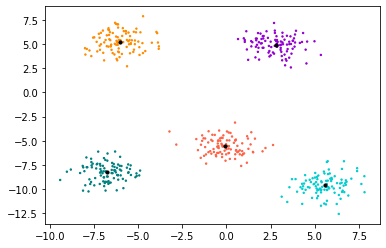

In [18]:
print('iterations to converge:'+str(kmeans_demo.n_iter_))
print('cluster centroids=')
print(str(kmeans_demo.cluster_centers_))
print()

colors_toplot=[]
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(x[:,0],x[:,1],c=colors_toplot,s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0],kmeans_demo.cluster_centers_[:,1],c='black',s=10,marker='o')  

### KMeans on Digits Dataset (KMeans for labelling)

Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

In [19]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

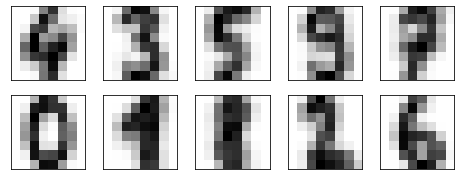

In [21]:
fig,ax=plt.subplots(2,5,figsize=(8,3))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [22]:
from scipy.stats import mode

labels=np.zeros_like(clusters)
for i in range(10):
  mask=(clusters==i)
  labels[mask]=mode(digits.target[mask])[0]

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

0.7935447968836951

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

Text(89.18, 0.5, 'predicted label')

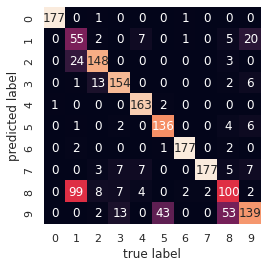

In [25]:
mat=confusion_matrix(digits.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### KMeans on Iris Dataset (Elbow Method)

We will perform KMeans on the famous Iris Dataset which has four features: sepal length, sepal width, petal length, and petal width. The fifth column is for species, which holds the value for these types of plants.

In [26]:
from sklearn import datasets

In [27]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
x=df.iloc[:,[0,1,2,3]].values
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
#starting with k as 5
kmeans5=KMeans(n_clusters=5)
y_kmeans5=kmeans5.fit_predict(x)
print(y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


In [29]:
kmeans5.cluster_centers_

array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

How do we choose the optimal number of clusters? There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.

This graph generally ends up shaped like an elbow, hence its name:

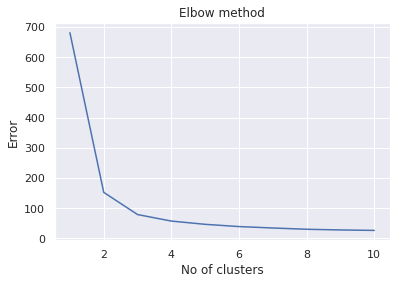

In [30]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i).fit(x)
  kmeans.fit(x)
  error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()  

The output graph of the Elbow method shows that the shape of elbow is approximately formed at k=3. The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [31]:
kmeans3=KMeans(n_clusters=3)
y_kmeans3=kmeans3.fit_predict(x)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [32]:
kmeans3.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

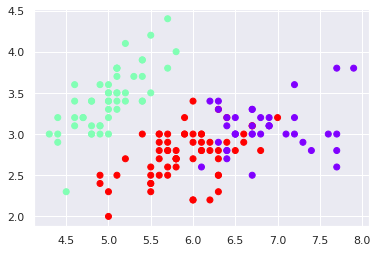

In [33]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

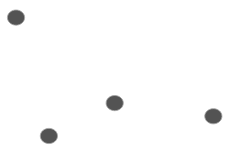

We can assign each of these points to a separate cluster:

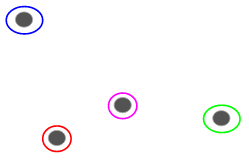

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

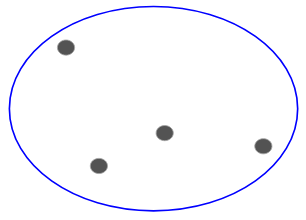

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

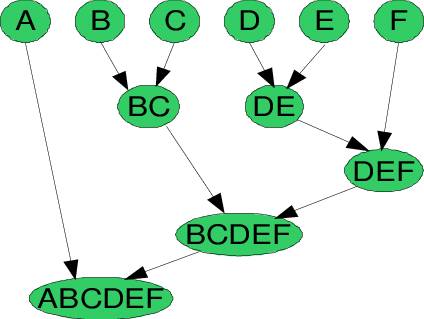

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

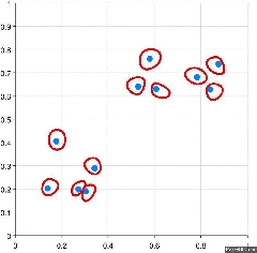

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

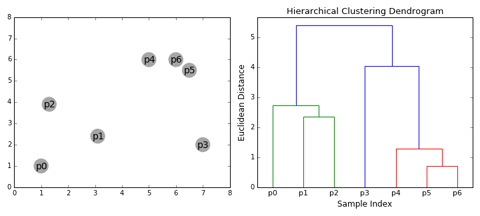



Note:- 

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters. 

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

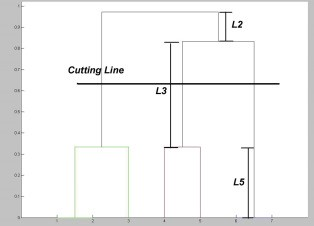

In [34]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   6002      0 --:--:-- --:--:-- --:--:--  6002
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0  30907      0 --:--:-- --:--:-- --:--:-- 30907


### Agglomerative Clustering on Mall Visitors Database

In [35]:
import pandas as pd
dataset=pd.read_csv('./Mall_Customers.csv')

In [36]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [37]:
x=dataset.iloc[:,[3,4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

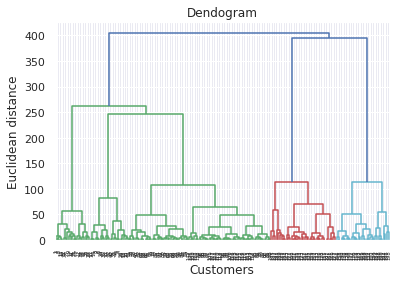

In [38]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

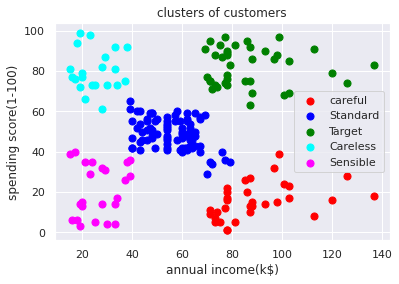

In [40]:
#visuslization
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,c='red',label='careful')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,c='blue',label='Standard')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=50,c='green',label='Target')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=50,c='cyan',label='Careless')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=50,c='magenta',label='Sensible')
plt.title('clusters of customers')
plt.xlabel('annual income(k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data=pd.read_csv('./Wholesale customers data.csv')
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [43]:
from sklearn.preprocessing import normalize
data_scaled=normalize(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages - 

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



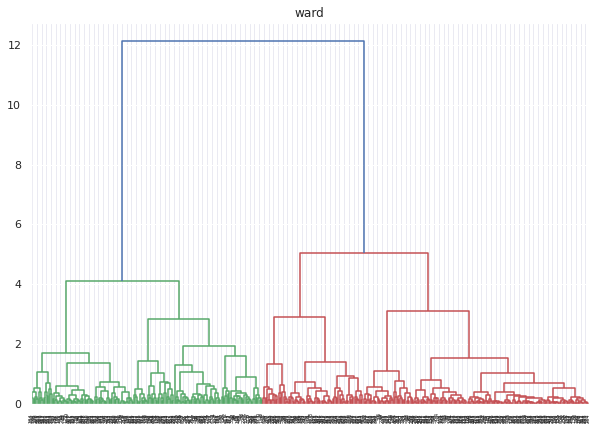

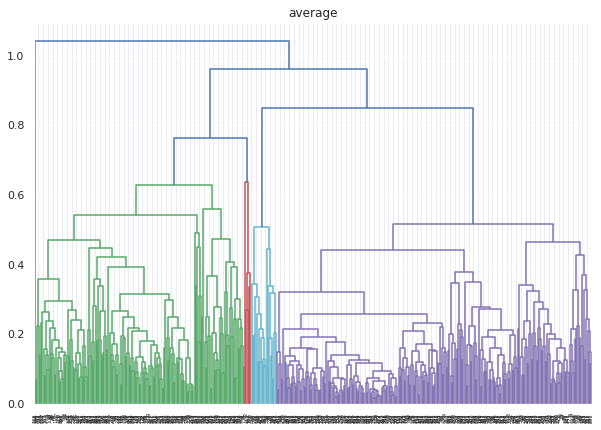

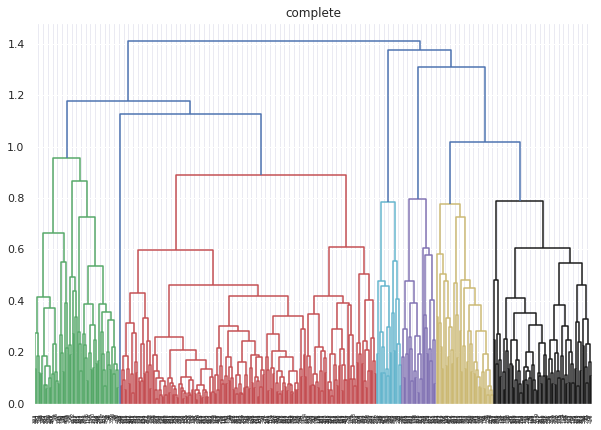

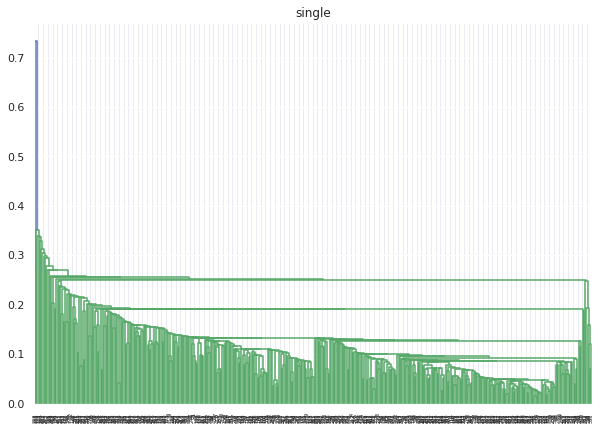

In [44]:
import scipy.cluster.hierarchy as shc
linkages=['ward','average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10,7))
  plt.title(linkage)
  dend=shc.dendrogram(shc.linkage(data_scaled,method=linkage))

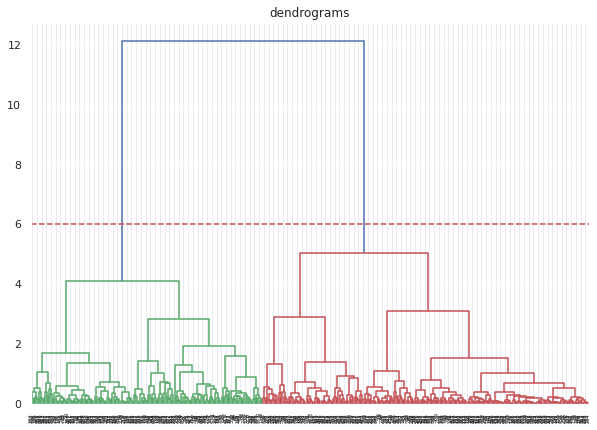

In [45]:
threshold = 6 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10,7))
plt.title('dendrograms')
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=threshold,color='r',linestyle='--')

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

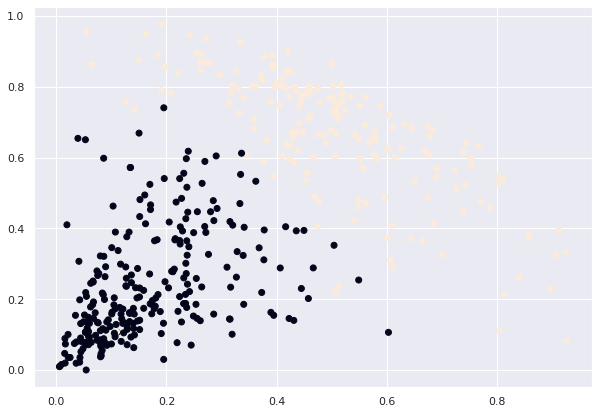

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

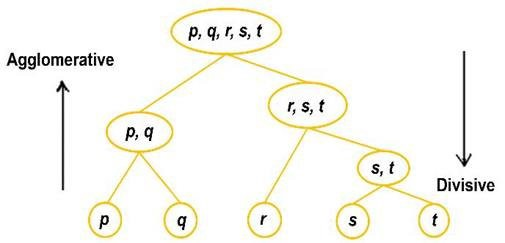

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.